In [353]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [403]:
def classificator (dataset, classifier, testsize):
    accuracy_dict={}
    x_data=dataset.drop(columns=[classifier])
    y_data=dataset.loc[:,classifier]
    x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=testsize,random_state=10)


    # RandomForestClassifier 
    rf_model = RandomForestClassifier(n_estimators=1000, random_state=20)
    rf_model.fit(x_train, y_train)

    y_pred = rf_model.predict(x_test)

    # Valutazione delle prestazioni del modello
    accuracy = accuracy_score(y_test, y_pred)
    #print("Accuratezza del modello RandomForestClassifier: %.3f" %accuracy)
    accuracy_dict['RandomForest']=round(accuracy,3)

    # Classificatore SVM con solo relevant feature
    svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

    svm_classifier.fit(x_train, y_train)
    y_pred = svm_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    #print("Accuratezza del classificatore SVM: %.3f" %accuracy)
    accuracy_dict['SVM']=round(accuracy,3)

    # Crea il modello di regressione logistica con solo relevant
    logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=42)

    logistic_regression.fit(x_train, y_train)
    y_pred = logistic_regression.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    #print("Accuratezza del modello di regressione logistica: %.3f" %accuracy)
    accuracy_dict['Regression']=accuracy

    # DecisionTreeClassifier con tutte le feature
    tree_classifier = DecisionTreeClassifier(random_state=42)

    tree_classifier.fit(x_train, y_train)
    y_pred = tree_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    #print("Accuratezza del classificatore ad albero decisionale: %.3f" %accuracy)
    accuracy_dict['Tree']=round(accuracy,3)


    # Classificatore naive bayes con relevant feature
    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(x_train, y_train)

    y_pred = naive_bayes_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    #print("Accuratezza del classificatore Naive Bayes: %.3f" %accuracy)
    accuracy_dict['Bayes']=round(accuracy,3)

    return accuracy_dict


In [355]:
def remove_outliers(df):

    df_clean = df.copy()  # Copia il DataFrame originale per non modificarlo direttamente

    for col in df.columns:
        if col != 'quality':
            q1 = df[col].quantile(0.25)  # Calcola il primo quartile
            q3 = df[col].quantile(0.75)  # Calcola il terzo quartile
            iqr = q3 - q1  # Calcola l'interquartile range (IQR)

            # Calcola i limiti per gli outlier
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Rimuovi gli outlier
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

In [356]:
def replace_outliers_with_median(df):
    df_clean = df.copy()  # Copia il DataFrame originale per non modificarlo direttamente

    for col in df.columns:
        if col != 'quality':
            q1 = df[col].quantile(0.25)  # Calcola il primo quartile
            q3 = df[col].quantile(0.75)  # Calcola il terzo quartile
            iqr = q3 - q1  # Calcola l'interquartile range (IQR)

            # Calcola i limiti per gli outlier
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Sostituisci gli outlier con la mediana
            median = df_clean[col].median()
            df_clean[col] = df_clean[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df_clean


In [357]:
def plot_boxplots(dataframe):
    num_plots = len(dataframe.columns) - 1  # Numero di colonne nel DataFrame escludendo "quality"
    cols_per_row = 4 

    # Calcola il numero di righe necessarie
    num_rows = (num_plots - 1) // cols_per_row + 1

    # Crea il layout dei subplot
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

    # Flatten l'array di assi se è multidimensionale
    axes = axes.flatten()

    # Itera sulle colonne del DataFrame escludendo "quality"
    for i, col in enumerate(dataframe.drop(columns='quality')):
        # Seleziona l'asse corrente
        ax = axes[i]

        # Disegna il boxplot per la feature corrente con "quality" sulle x
        sns.boxplot(x='quality', y=col, data=dataframe, ax=ax)

        # Imposta il titolo del boxplot
        ax.set_title(f'Boxplot di {col}')

        # Ruota le etichette sull'asse x per una migliore leggibilità
        ax.tick_params(axis='x', rotation=45)

        # Imposta le etichette sull'asse y con precisione a tre cifre decimali
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

    # Rimuovi gli assi vuoti se ce ne sono
    for ax in axes[num_plots:]:
        ax.remove()

    # Imposta il layout dei subplot
    plt.tight_layout()

    # Mostra il grafico
    plt.show()


In [358]:
def plot_boxplots_comparision(dataframe_1, dataframe_clean_1):
    dataframe=dataframe_1.copy()
    dataframe_clean=dataframe_clean_1.copy()
    num_plots = len(dataframe.columns) - 1 # Numero di colonne nel DataFrame escludendo "quality" e Dataset
    cols_per_row = 4 

    # Calcola il numero di righe necessarie
    num_rows = (num_plots - 1) // cols_per_row + 1

    # Crea il layout dei subplot
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

    # Flatten l'array di assi se è multidimensionale
    axes = axes.flatten()

    # Concateniamo i DataFrame relevant e relevant_clean, aggiungendo una colonna 'Dataset' per distinguere tra i due
    dataframe['Dataset'] = 'Prima'
    dataframe_clean['Dataset'] = 'Dopo'

    # Uniamo i DataFrame
    combined_df = pd.concat([dataframe, dataframe_clean])

    # Iteriamo su ogni feature
    for i, col in enumerate(dataframe.columns):
        if col != 'quality' and col != 'Dataset':
            ax = axes[i]
            sns.boxplot(x='Dataset', y=col, data=combined_df, hue='Dataset', palette=["blue", "orange"], ax=ax)
            ax.set_title(f'Rimozione Outlier di {col}')
            
    # Rimuovi gli assi vuoti se ce ne sono
    for ax in axes[num_plots:]:
        ax.remove()

    # Imposta il layout dei subplot
    plt.tight_layout()
    plt.show()

In [359]:
def plot_bar_chart(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    colors = plt.cm.RdBu(np.array(values) / max(values))  # Utilizza la mappa di colori "RdBu" in base ai valori massimi

    #Aggiungi valori sulle barplot
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
    
    plt.bar(keys, values, color=colors)
    plt.xlabel('Chiavi')
    plt.ylabel('Valori')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(values) * 1.2)  # Estendi l'asse y del 10%
    plt.show()

In [360]:
def plot_bar_chart_df(df):
    if type(df) == pd.DataFrame:
        keys = df.index.tolist()  # Ottieni gli indici del DataFrame come chiavi
        values = df.iloc[:, 0].tolist()  # Ottieni i valori dalla prima colonna del DataFrame
    elif type(df) == pd.Series:
        keys = df.index.tolist()
        values = df.tolist()

    colors = plt.cm.RdBu(np.array(values) / max(values))  # Utilizza la mappa di colori "RdBu" in base ai valori massimi

    # Aggiungi valori sulle barplot
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
    
    plt.bar(keys, values, color=colors)
    plt.xlabel('Chiavi')
    plt.ylabel('Valori')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(values) * 1.2)  # Estendi l'asse y del 10%
    plt.show()



In [361]:
def new_quality_value(df):
    
    new_df = df.copy()
    # Mappa i valori della colonna 'quality' 
    quality_mapping = {3: 0, 4: 0, 5: 1, 6: 1, 7: 2, 8: 2}
    new_df['quality'] = new_df['quality'].replace(quality_mapping)
    
    return new_df


In [362]:
def plot_result(result):

    num_cols = len(result.columns)
    num_rows = (num_cols + 1) // 2 

    # Creazione del grafico a barre
    fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

    # Itera sul DataFrame e crea i subplot
    for i, (col_name, col_data) in enumerate(result.items()):
        row = i // 2
        col = i % 2
        keys = result.index
        values = col_data
        colors = plt.cm.RdBu(np.array(values) / max(values))
        
        for j, v in enumerate(values):
            axs[row, col].text(j, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
        
        axs[row, col].bar(keys, values, color=colors)
        axs[row, col].set_ylabel('Valori')
        axs[row, col].set_title(col_name)
        axs[row, col].set_xticks(keys)
        axs[row, col].set_xticklabels(keys, rotation=45, ha='right')
        axs[row, col].set_ylim(0, max(values) * 1.2)

    # Rimuovi i subplot non utilizzati
    for i in range(num_cols, num_rows*2):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()


In [401]:
def classification(winedataframe, testsize):

    data=wine_dataframe.copy()

    data_clean=replace_outliers_with_median(data)
    data_clean_remove=remove_outliers(data)

    relevant=wine_dataframe.drop(columns=['fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
    relevant_clean=replace_outliers_with_median(relevant)
    relevant_clean_remove=remove_outliers(relevant)

    result=pd.DataFrame()

    result['Data']=classificator(data,'quality',testsize)

    result['Relevant']=classificator(relevant,'quality', testsize)

    result['Data_Clean']=classificator(data_clean,'quality', testsize)

    result['Relevant_Clean']=classificator(relevant_clean, 'quality', testsize)

    result['Data_Remove']=classificator(data_clean_remove,'quality', testsize)

    result['Relevant_Remove']=classificator(relevant_clean_remove, 'quality', testsize)

    new_data=new_quality_value(data)

    result['New_Data']=classificator(new_data,'quality', testsize)

    relevant_new=new_data.drop(columns=['fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
    result['New_Relevant']=classificator(relevant_new,'quality', testsize)

    data_clean_new=replace_outliers_with_median(new_data)
    result['New_Data_Clean']=classificator(data_clean_new,'quality', testsize)

    relevant_clean_new=replace_outliers_with_median(relevant_new)
    result['New_Relevant_Clean']=classificator(relevant_clean_new,'quality', testsize)

    data_clean_new_remove=remove_outliers(new_data)
    result['New_Data_Remove']=classificator(data_clean_new_remove,'quality', testsize)

    relevant_new_remove=remove_outliers(relevant_new)
    result['New_Relevant_Remove']=classificator(relevant_new_remove,'quality', testsize)

    return result


In [363]:
wine_dataframe = pd.read_csv('restore_winedata.csv')
result=pd.DataFrame()
data=wine_dataframe.copy()
data.shape

(1599, 12)

In [404]:
r_15=classification(data,0.15)

In [405]:
r

,Data,Relevant,Data_Clean,Relevant_Clean,Data_Remove,Relevant_Remove,New_Data,New_Relevant,New_Data_Clean,New_Relevant_Clean,New_Data_Remove,New_Relevant_Remove
RandomForest,0.65900,0.62200,0.662000,0.62200,0.706000,0.720,0.859000,0.859000,0.850000,0.863000,0.861000,0.867000
SVM,0.45300,0.55600,0.425000,0.54700,0.517000,0.583,0.809000,0.809000,0.809000,0.809000,0.836000,0.833000
Regression,0.55625,0.55625,0.553125,0.54375,0.542017,0.640,0.834375,0.834375,0.828125,0.828125,0.840336,0.846667
Tree,0.59700,0.55900,0.534000,0.55000,0.576000,0.670,0.794000,0.800000,0.800000,0.800000,0.815000,0.840000
Bayes,0.50900,0.56200,0.534000,0.55300,0.513000,0.597,0.794000,0.828000,0.784000,0.831000,0.794000,0.827000


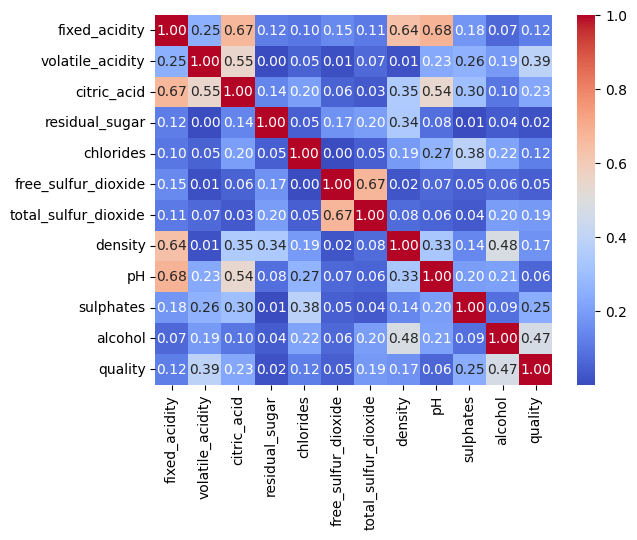

In [364]:
corr_matrix = data.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

FEATURE CON MINIMA CORRELAZIONE (>0,20) SONO: <BR>ALCOHOL, SULPHATES, CITRIC_ACID, VOLATILE_ACIDITY

In [366]:
data_clean=replace_outliers_with_median(data)
data_clean.shape

(1599, 12)

In [367]:
relevant=wine_dataframe.drop(columns=['fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
relevant_clean=replace_outliers_with_median(relevant)
relevant_clean.shape

(1599, 5)

Accuratezza del modello RandomForestClassifier: 0.667
Accuratezza del classificatore SVM: 0.450
Accuratezza del modello di regressione logistica: 0.565
Accuratezza del classificatore ad albero decisionale: 0.583
Accuratezza del classificatore Naive Bayes: 0.512


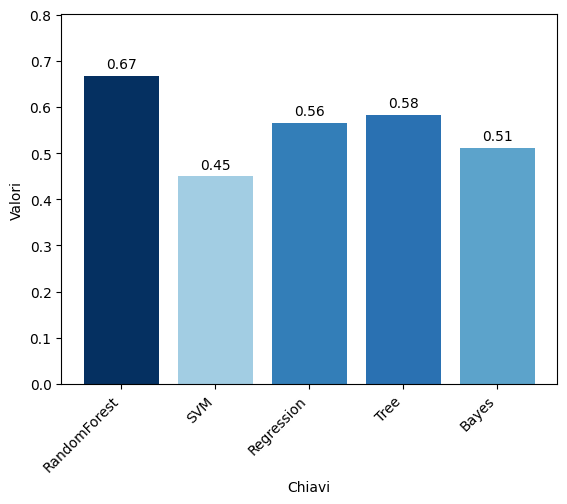

In [365]:
result['Data']=classificator(data,'quality')
plot_bar_chart_df(result['Data'])

Accuratezza del modello RandomForestClassifier: 0.610
Accuratezza del classificatore SVM: 0.545
Accuratezza del modello di regressione logistica: 0.560
Accuratezza del classificatore ad albero decisionale: 0.547
Accuratezza del classificatore Naive Bayes: 0.560


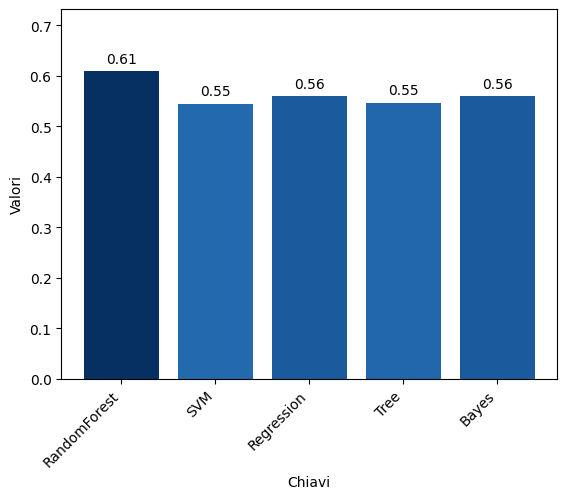

In [368]:
result['Relevant']=classificator(relevant,'quality')
plot_bar_chart_df(result['Relevant'])

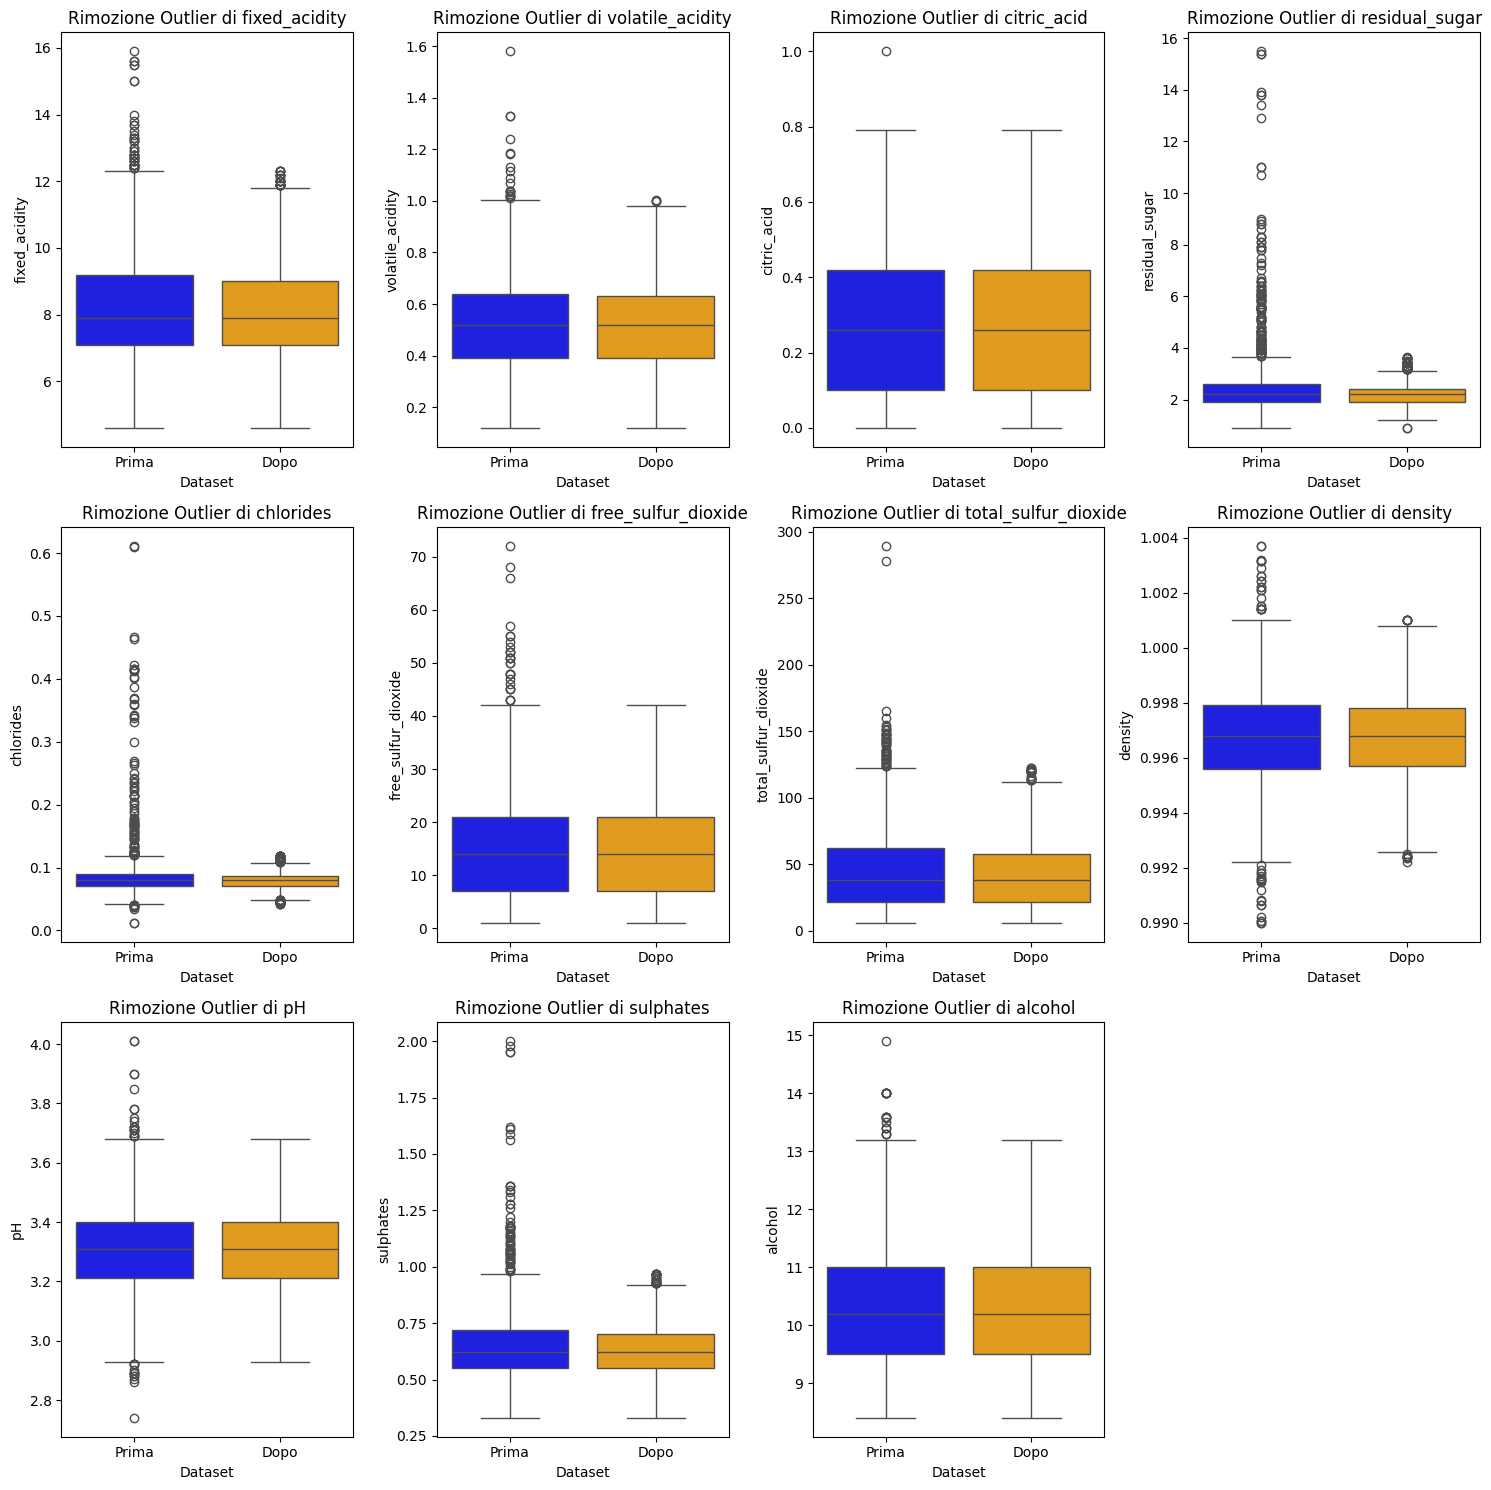

In [369]:
plot_boxplots_comparision(data,data_clean)

Accuratezza del modello RandomForestClassifier: 0.665
Accuratezza del classificatore SVM: 0.430
Accuratezza del modello di regressione logistica: 0.557
Accuratezza del classificatore ad albero decisionale: 0.537
Accuratezza del classificatore Naive Bayes: 0.537


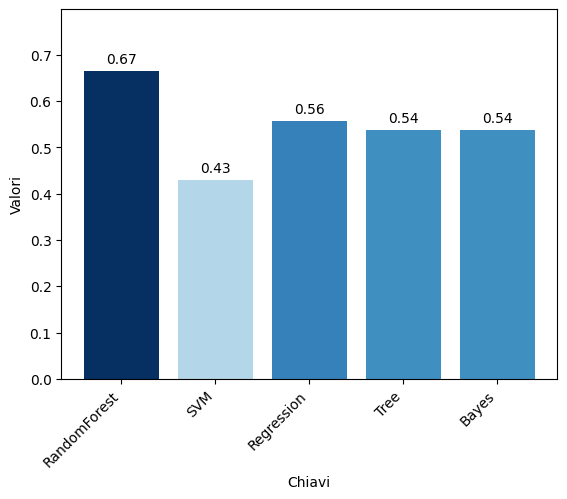

In [370]:
result['Data_Clean']=classificator(data_clean,'quality')
plot_bar_chart_df(result['Data_Clean'])

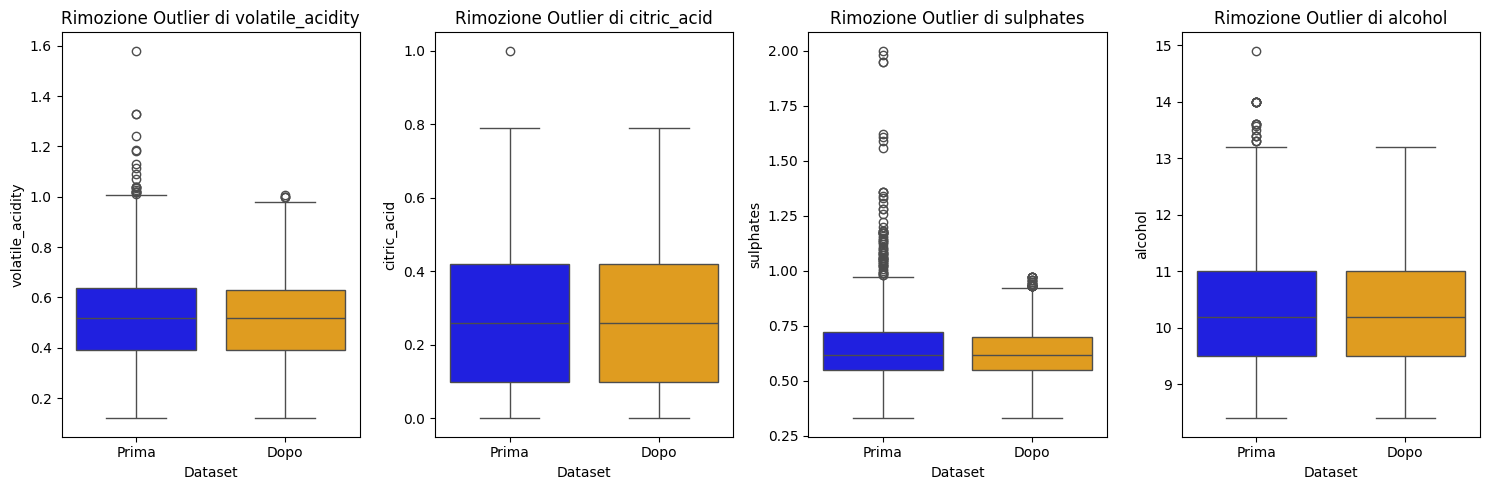

In [371]:
plot_boxplots_comparision(relevant,relevant_clean)

Accuratezza del modello RandomForestClassifier: 0.620
Accuratezza del classificatore SVM: 0.537
Accuratezza del modello di regressione logistica: 0.542
Accuratezza del classificatore ad albero decisionale: 0.547
Accuratezza del classificatore Naive Bayes: 0.555


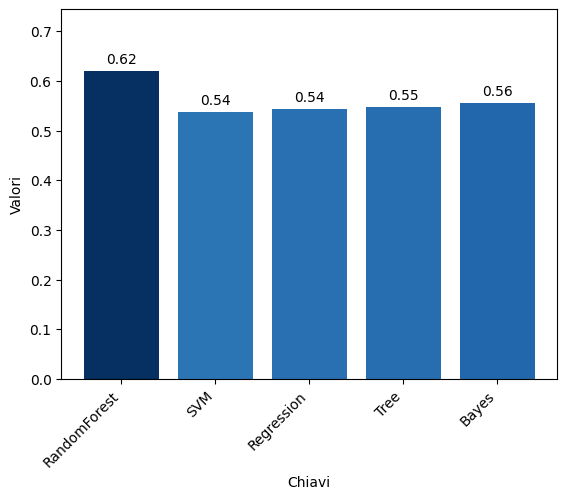

In [372]:
result['Relevant_Clean']=classificator(relevant_clean, 'quality')
plot_bar_chart_df(result['Relevant_Clean'])

In [373]:
data_clean_remove=remove_outliers(data)
print(data_clean_remove.shape)

(1188, 12)


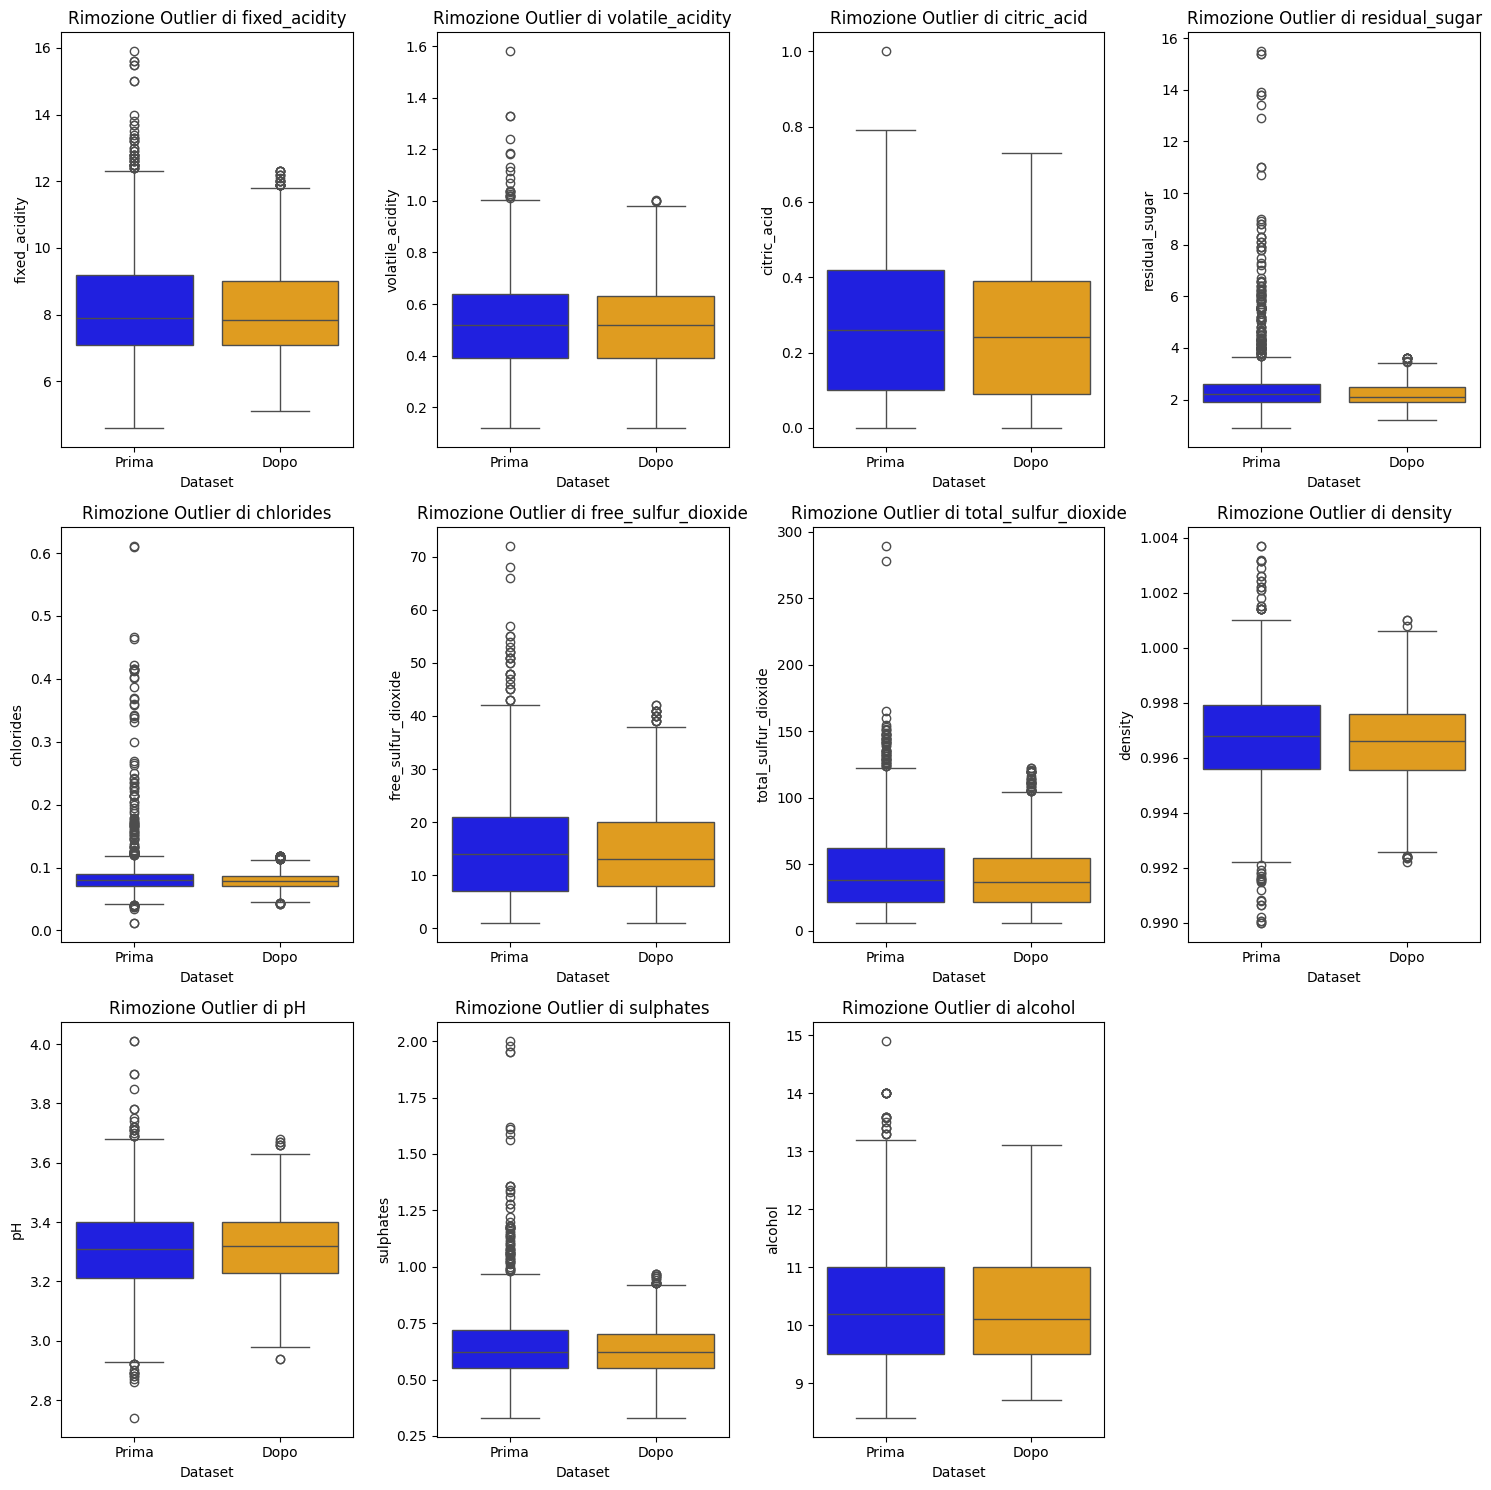

In [374]:
plot_boxplots_comparision(data,data_clean_remove)

Accuratezza del modello RandomForestClassifier: 0.690
Accuratezza del classificatore SVM: 0.539
Accuratezza del modello di regressione logistica: 0.572
Accuratezza del classificatore ad albero decisionale: 0.582
Accuratezza del classificatore Naive Bayes: 0.498


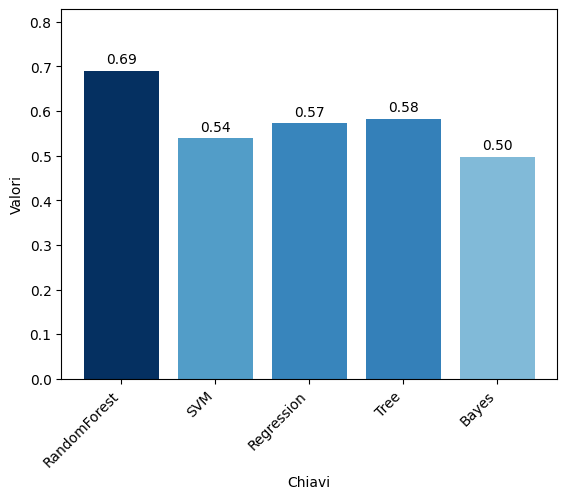

In [375]:
result['Data_Remove']=classificator(data_clean_remove,'quality')
plot_bar_chart_df(result['Data_Remove'])

In [376]:
relevant_clean_remove=remove_outliers(relevant)
print(relevant_clean_remove.shape)

(1496, 5)


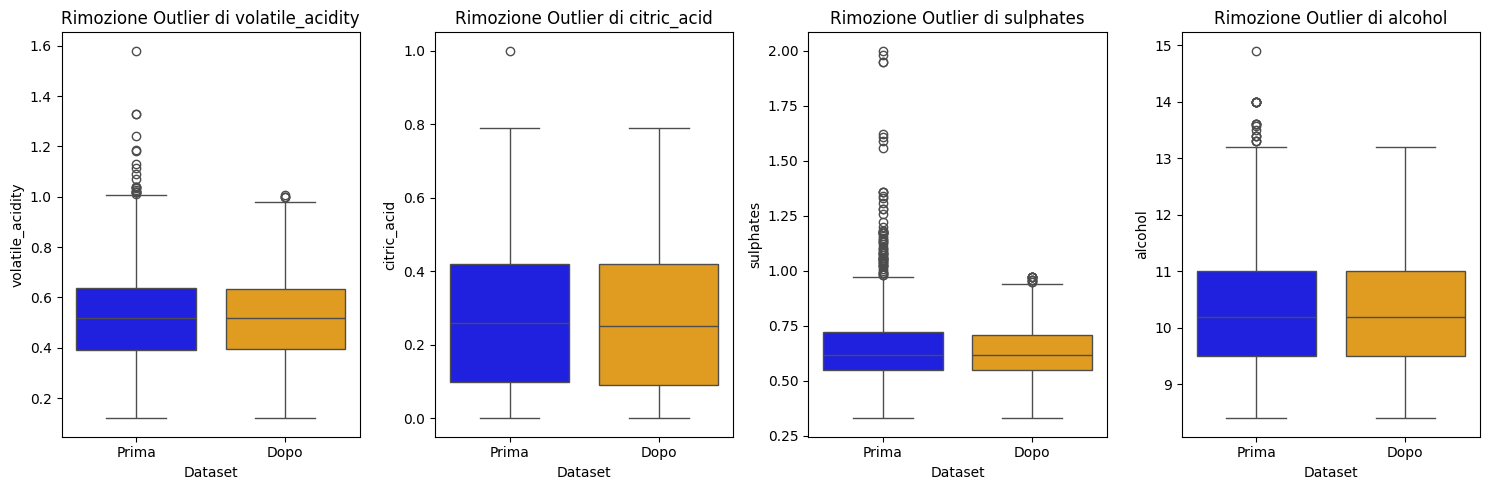

In [377]:
plot_boxplots_comparision(relevant,relevant_clean_remove)

Accuratezza del modello RandomForestClassifier: 0.693
Accuratezza del classificatore SVM: 0.575
Accuratezza del modello di regressione logistica: 0.628
Accuratezza del classificatore ad albero decisionale: 0.602
Accuratezza del classificatore Naive Bayes: 0.599


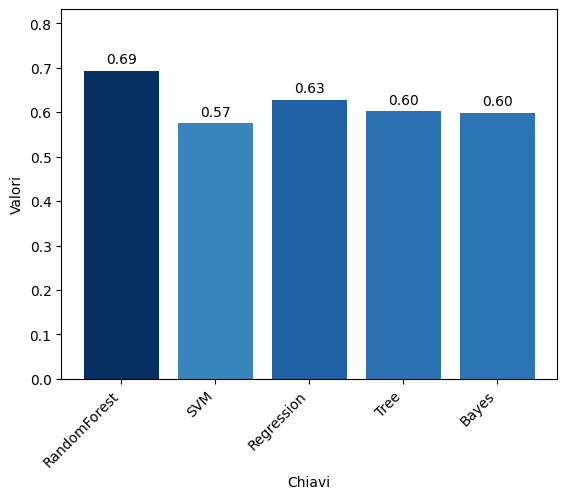

In [378]:
result['Relevant_Remove']=classificator(relevant_clean_remove, 'quality')
plot_bar_chart_df(result['Relevant_Remove'])

NUOVO APPROCCIO: RIDUZIONE DEI TIPI DI QUALITY  (3/4=0, 5/6=1, 7/8=2)

In [379]:
new_data=new_quality_value(data)

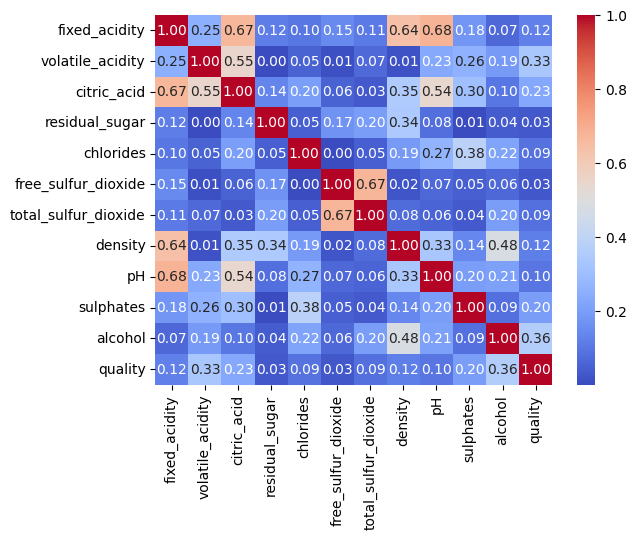

In [380]:
corr_matrix_new = new_data.corr().abs()
sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

LE FEATURE CHE HANNO UN CORRELAZIONE ALMENO MINIMA (>0.20) <br> SONO SEMPRE : ALCOHOL, SULPHATES, CITRIC_ACID, VOLATILE_ACIDITY

Accuratezza del modello RandomForestClassifier: 0.860
Accuratezza del classificatore SVM: 0.810
Accuratezza del modello di regressione logistica: 0.835
Accuratezza del classificatore ad albero decisionale: 0.760
Accuratezza del classificatore Naive Bayes: 0.790


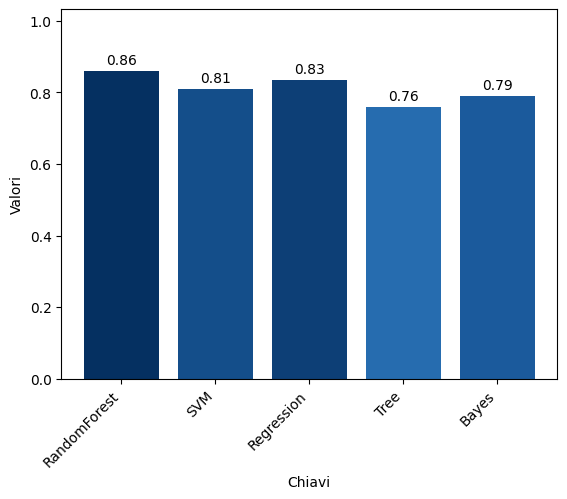

In [381]:
result['New_Data']=classificator(new_data,'quality')
plot_bar_chart_df(result['New_Data'])

In [382]:
data_clean_new=replace_outliers_with_median(new_data)
data_clean_new.shape

(1599, 12)

Accuratezza del modello RandomForestClassifier: 0.850
Accuratezza del classificatore SVM: 0.810
Accuratezza del modello di regressione logistica: 0.830
Accuratezza del classificatore ad albero decisionale: 0.797
Accuratezza del classificatore Naive Bayes: 0.777


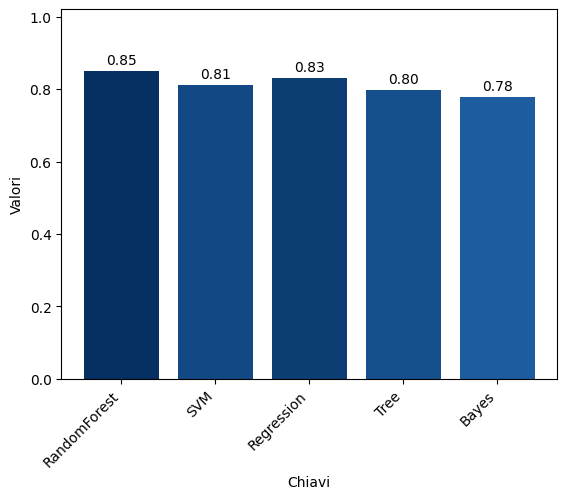

In [383]:
result['New_Data_Clean']=classificator(data_clean_new,'quality')
plot_bar_chart_df(result['New_Data_Clean'])

In [384]:
relevant_new=new_data.drop(columns=['fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
relevant_clean_new=replace_outliers_with_median(relevant_new)
relevant_clean_new.shape

(1599, 5)

Accuratezza del modello RandomForestClassifier: 0.853
Accuratezza del classificatore SVM: 0.810
Accuratezza del modello di regressione logistica: 0.835
Accuratezza del classificatore ad albero decisionale: 0.797
Accuratezza del classificatore Naive Bayes: 0.820


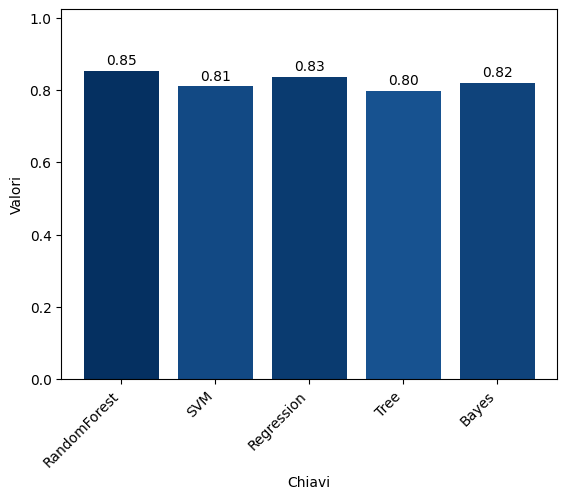

In [393]:
result['New_Relevant']=classificator(relevant_new,'quality')
plot_bar_chart_df(result['New_Relevant'])

Accuratezza del modello RandomForestClassifier: 0.853
Accuratezza del classificatore SVM: 0.810
Accuratezza del modello di regressione logistica: 0.833
Accuratezza del classificatore ad albero decisionale: 0.790
Accuratezza del classificatore Naive Bayes: 0.818


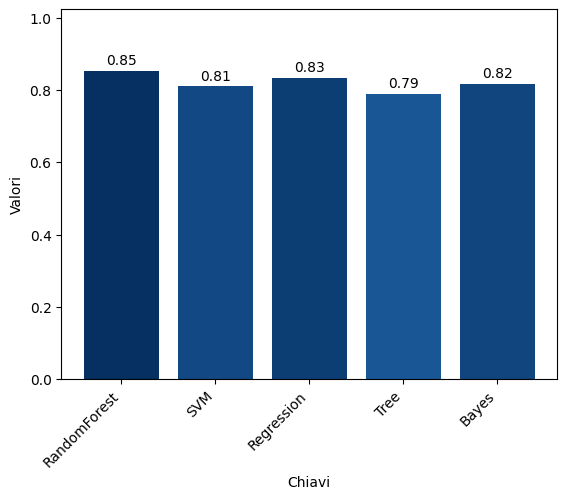

In [386]:
result['New_Relevant_Clean']=classificator(relevant_clean_new,'quality')
plot_bar_chart_df(result['New_Relevant_Clean'])

In [387]:
data_clean_new_remove=remove_outliers(new_data)
data_clean_new_remove.shape

(1188, 12)

Accuratezza del modello RandomForestClassifier: 0.869
Accuratezza del classificatore SVM: 0.852
Accuratezza del modello di regressione logistica: 0.842
Accuratezza del classificatore ad albero decisionale: 0.828
Accuratezza del classificatore Naive Bayes: 0.801


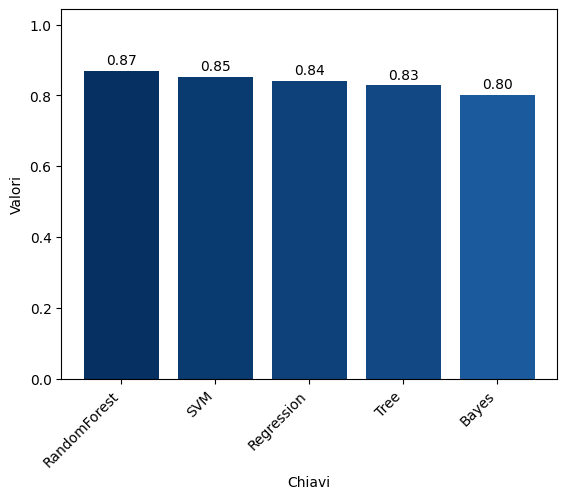

In [388]:
result['New_Data_Remove']=classificator(data_clean_new_remove,'quality')
plot_bar_chart_df(result['New_Data_Remove'])

In [394]:
relevant_new_remove=remove_outliers(relevant_new)
relevant_new_remove.shape

(1496, 5)

Accuratezza del modello RandomForestClassifier: 0.853
Accuratezza del classificatore SVM: 0.810
Accuratezza del modello di regressione logistica: 0.835
Accuratezza del classificatore ad albero decisionale: 0.797
Accuratezza del classificatore Naive Bayes: 0.820


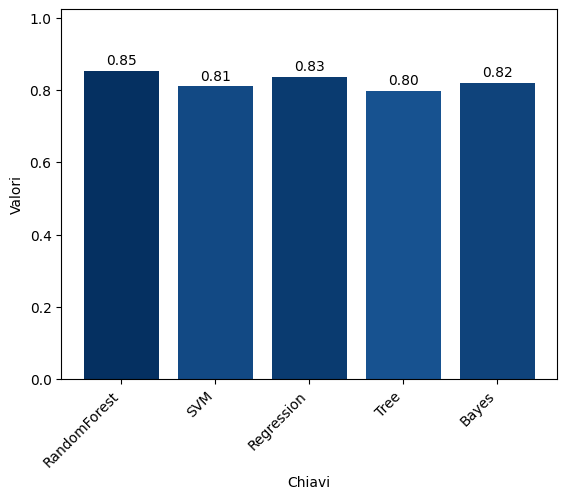

In [395]:
result['New_Relevant_Remove']=classificator(relevant_new_remove,'quality')
plot_bar_chart_df(result['New_Relevant_Remove'])

In [391]:
result

,Data,Relevant,Data_Clean,Relevant_Clean,Data_Remove,Relevant_Remove,New_Data,New_Data_Clean,New_Relevant,New_Relevant_Clean,New_Data_Remove,New_Relevant_Remove
RandomForest,0.667,0.610,0.6650,0.6200,0.690000,0.693000,0.860,0.850,0.853,0.8530,0.869000,0.856000
SVM,0.450,0.545,0.4300,0.5370,0.539000,0.575000,0.810,0.810,0.810,0.8100,0.852000,0.826000
Regression,0.565,0.560,0.5575,0.5425,0.572391,0.628342,0.835,0.830,0.835,0.8325,0.841751,0.839572
Tree,0.583,0.547,0.5370,0.5470,0.582000,0.602000,0.760,0.797,0.797,0.7900,0.828000,0.805000
Bayes,0.512,0.560,0.5370,0.5550,0.498000,0.599000,0.790,0.777,0.820,0.8180,0.801000,0.832000


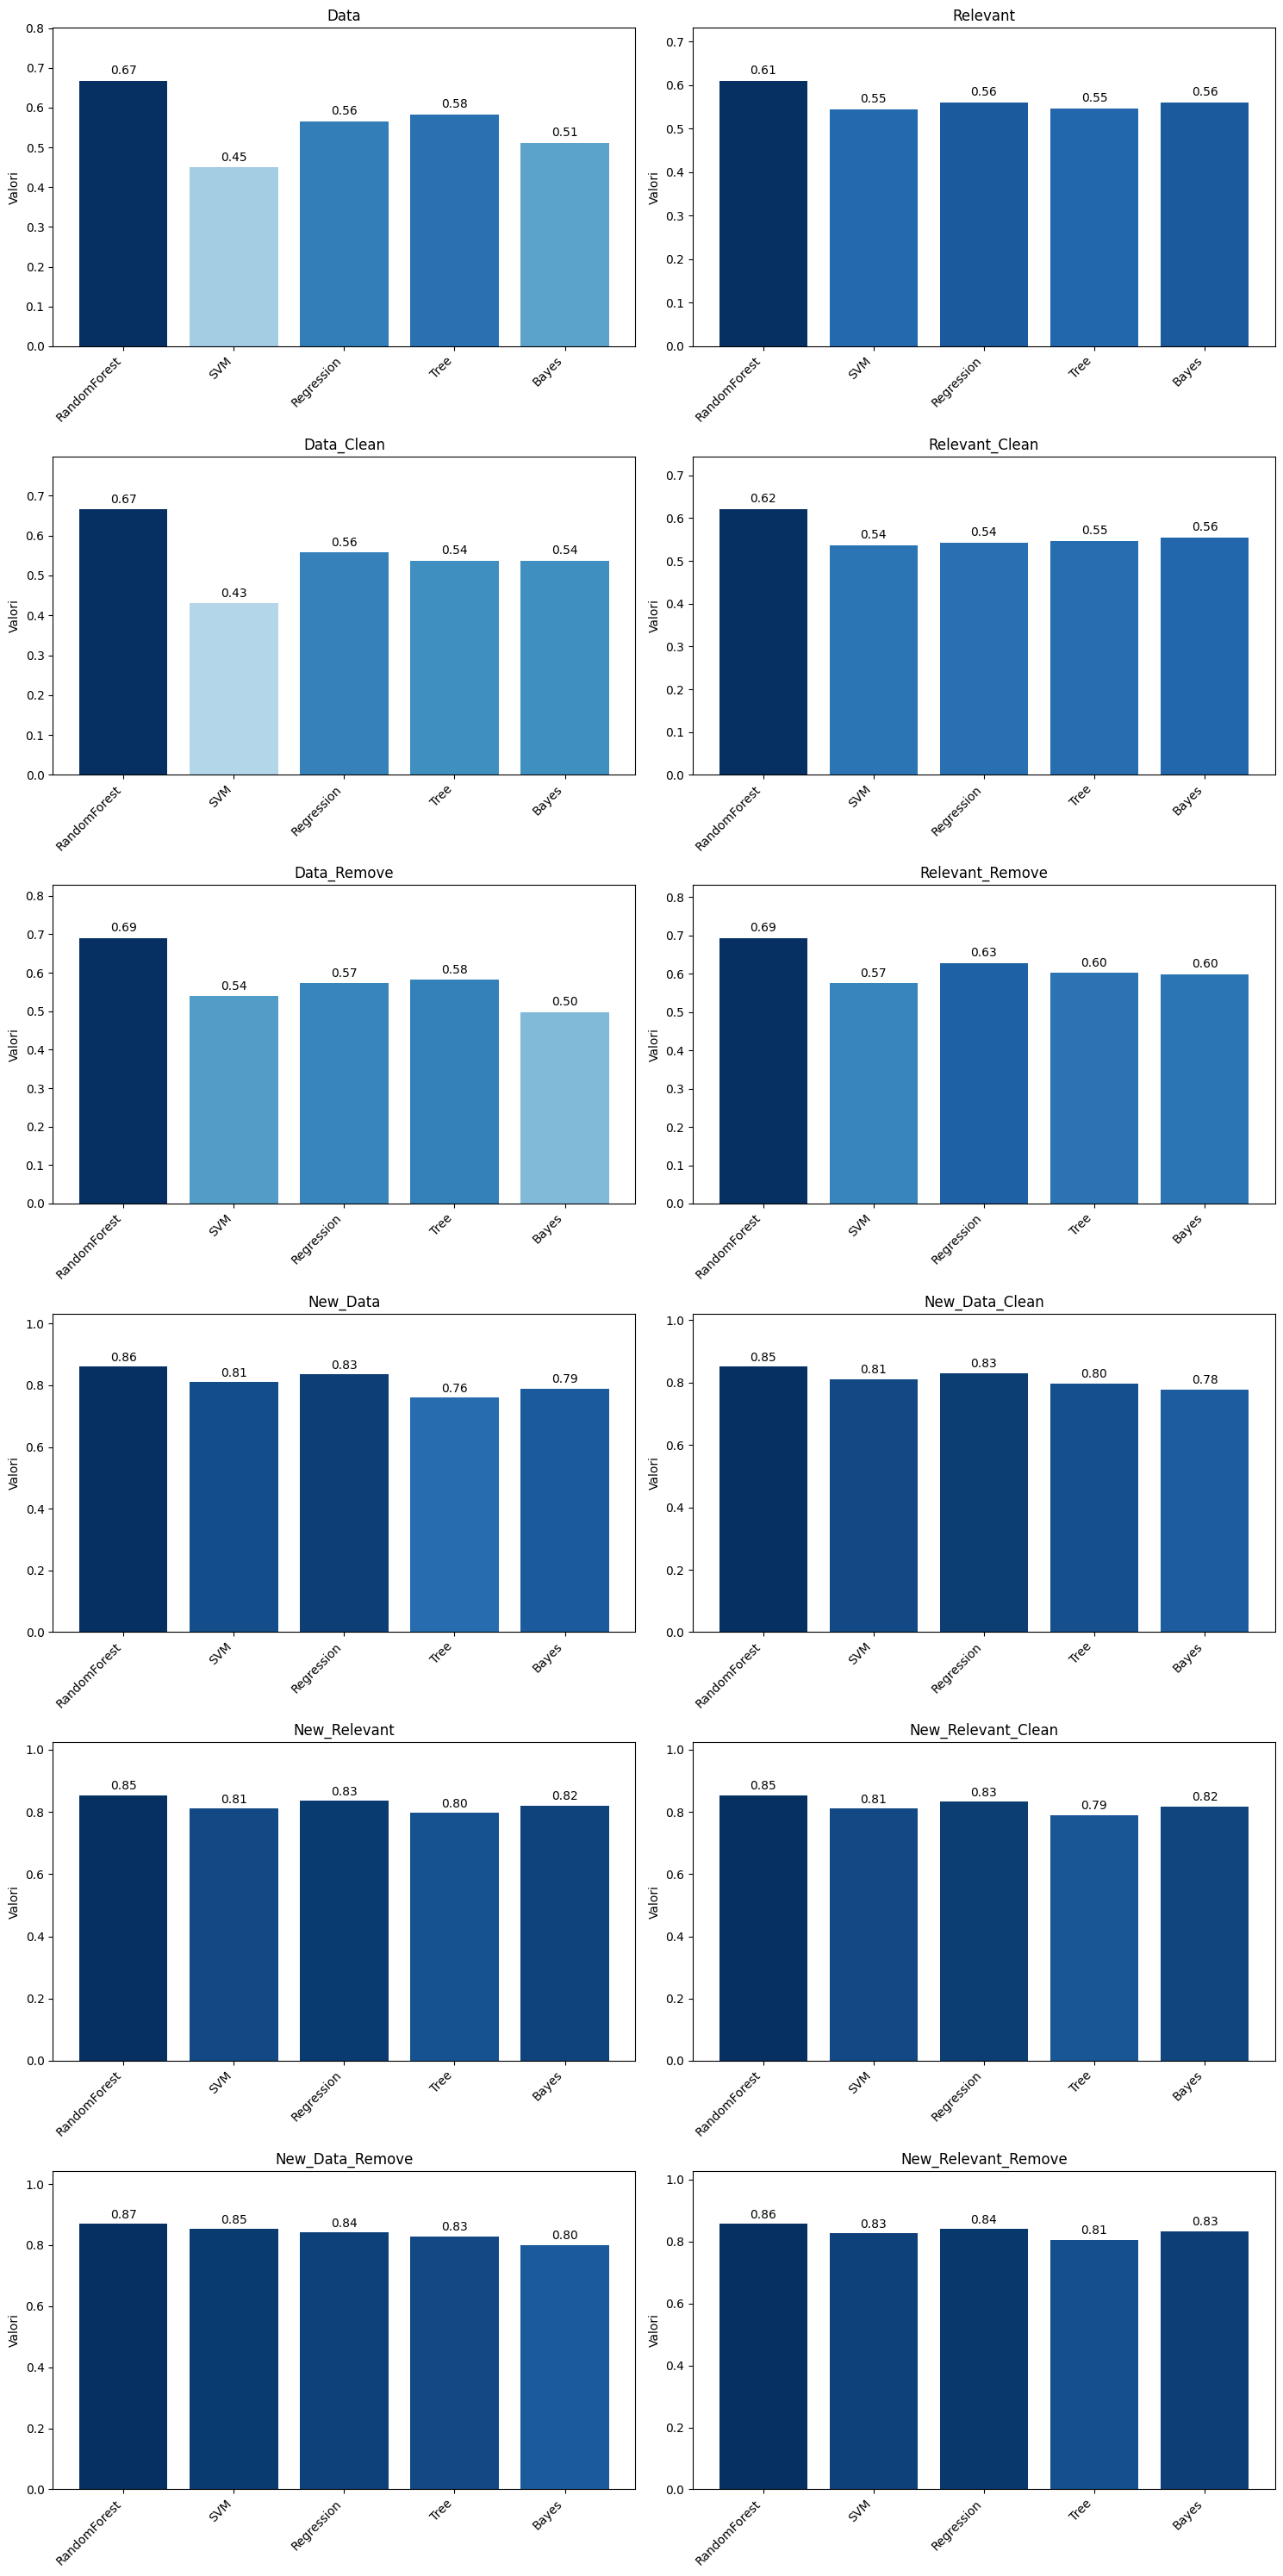

In [392]:
plot_result(result)